**ML COURSE 2024-2025**
# LAB7  NEURAL NETWORKS 1
In this lab you will see how to construct, train and evaluate a NN model using Keras. We will use MNIST as dataset. 

## Deep Learning Frameworks

| **Framework**  | **Description**                                         | **Strengths**                                          | **Use Case**                          |
|----------------|---------------------------------------------------------|--------------------------------------------------------|---------------------------------------|
| <img src="https://keras.io/img/logo.png" width="200" />      | High-level API for building neural networks, runs on TensorFlow | Easy to use, simple model building                      | Quick prototyping and beginners       |
|<img src="https://www.gstatic.com/devrel-devsite/prod/v8d1d0686aef3ca9671e026a6ce14af5c61b805aabef7c385b0e34494acbfc654/tensorflow/images/lockup.svg" width="200" />| Powerful, flexible platform for machine learning       | Scalable, strong production support, wide ecosystem     | Production, large-scale applications  |
| <img src="https://images.icon-icons.com/2699/PNG/512/pytorch_logo_icon_169823.png" width="200" />     | Dynamic computation graph, more intuitive              | Debug-friendly, popular in research, dynamic graphs     | Research, experimentation, and flexibility |


In [ ]:
!pip install matplotlib

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# new library for deep learning!
import tensorflow as tf

2025-06-03 14:42:57.843044: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-03 14:42:57.844898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 14:42:57.852193: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 14:42:57.870488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748961777.898482    5778 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748961777.90

## MNIST dataset

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a classic benchmark dataset in the field of machine learning and computer vision. It consists of **70,000 grayscale images** of handwritten digits from **0 to 9**, each sized **28 x28 pixels**.

## Dataset Details

- **Training set**: 60,000 images  
- **Test set**: 10,000 images  
- **Image format**: 28x28 grayscale  
- **Classes**: 10 (digits 0 through 9)  
- **Label format**: Integer label corresponding to the digit in the image

Each image is a low-resolution scan of a digit, making the dataset ideal for:
- Image classification
- Deep learning model benchmarking
- Feature extraction and representation learning

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Class of x_train: <class 'numpy.ndarray'>
Class of y_train: <class 'numpy.ndarray'>
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


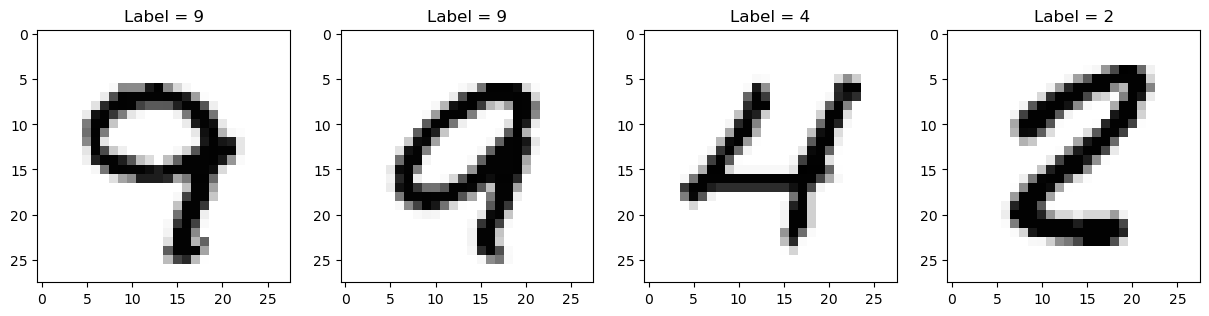

In [3]:
# Load and explore MNIST dataset
# This loads the MNIST dataset and splits it into training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print data type and shape information for training and test sets
print('Class of x_train: {}'.format(type(x_train)))
print('Class of y_train: {}'.format(type(y_train)))  
print('Shape of x_train: {}'.format(x_train.shape))  
print('Shape of y_train: {}'.format(y_train.shape)) 
print('Shape of x_test: {}'.format(x_test.shape))    
print('Shape of y_test: {}'.format(y_test.shape))    

# Visualize 4 random samples from the training set
# Randomly select 4 indices from the training set
idxes = [np.random.randint(60000) for i in range(4)]

# Create a new figure with a size of 15x8 inches
plt.figure(figsize=(15,8))

# Plot each randomly selected image with its corresponding label
for i in range(4):
  plt.subplot(1, 4, i+1)  # Create a subplot in a 1-row, 4-column grid
  plt.imshow(x_train[idxes[i]], cmap='Greys')  # Display the image in grayscale
  plt.title('Label = {}'.format(y_train[idxes[i]]))  # Set title to the digit label


Text(0.5, 1.0, 'Class distribution in test dataset')

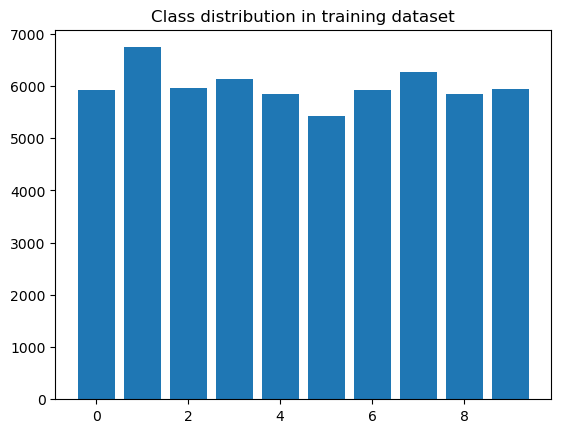

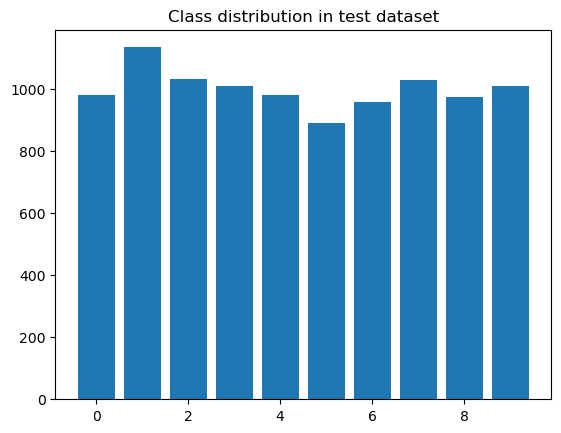

In [4]:
# Visualize the distribution of classes in training and in test

# Count the number of occurrences of each digit in the training labels
train_class_counter = Counter(y_train) #dictionary with keys as digits and values as counts

# Create a new figure and plot a bar chart for the training set class distribution
plt.figure()
plt.bar(train_class_counter.keys(), train_class_counter.values())
plt.title('Class distribution in training dataset')  # Title for the plot

# Count the number of occurrences of each digit in the test labels
test_class_counter = Counter(y_test)

# Create a new figure and plot a bar chart for the test set class distribution
plt.figure()
plt.bar(test_class_counter.keys(), test_class_counter.values())
plt.title('Class distribution in test dataset')  # Title for the plot

In [5]:
# Don't forget about normalization of input data. 
# Min-max normalization serve a scalare ogni valore tra 0 e 1 
#(min che può assumere ogni pixel è 0 max è 255)
# (prendere il valore - min) / (max- min)
x_train, x_test = x_train / 255.0, x_test / 255.0

## Create a model with Keras: Sequential class

In [6]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout

## Keras Classes and Layers Overview

### Keras Model Class

- **`Sequential`**:  
  A simple way to build models layer-by-layer in a linear stack. Each layer receives the output of the previous one. Suitable for straightforward architectures.  
  ⚠️ Use the **Functional API** if your model involves more complex topologies, such as multiple inputs, multiple outputs, or shared layers.

### Keras Layers Used in This Lab

- **`Dense`**:  
  A fully connected layer where each input node is connected to every output node.

- **`Flatten`**:  
  Converts a multi-dimensional input (e.g., a 2D image) into a 1D vector. Commonly used to bridge convolutional layers and dense layers.

- **`Dropout`**:  
  A regularization technique that randomly sets a fraction of input units to zero during training, helping prevent overfitting (will see it compared to other regularization techniques later).

In [7]:
# Define a function to create a Keras Sequential model
def create_model(compile_model=False):
    # DEFINE a sequential model with a specific architecture
    model = Sequential([                    # Lista dei layer:
        Input(shape=(28, 28)),              # Input layer for 28x28 grayscale images
        Flatten(),                          # Flatten 2D input into 1D vector
        Dense(512, activation='relu'),      # Fully connected layer with 512 (scelto noi) units (neurons) and ReLU activation
        Dropout(0.2),                       # Dropout layer with 20% dropout (scelto noi) rate for regularization
        Dense(10, activation='softmax')     # Output layer with 10 (numero di classi possibili - 10 cifre) units (one per digit class) and softmax activation
    ])

    # If we want to TRAIN:
    # If compile_model is True, compile the model before returning
    if compile_model:
        # Compiling the model configures the learning process:
        # - Specifies the loss function (how model error is calculated)
        # - Specifies the optimizer (how the model updates weights)
        # - Specifies metrics to track (e.g., accuracy)
        model.compile(
            loss='sparse_categorical_crossentropy',  # Loss for integer class labels
            optimizer='adam',                        # Adam optimizer for efficient training
            metrics=['accuracy']                     # Track accuracy as the performance metric
        )
    
    return model  # Return the constructed (and optionally compiled) model

# Create and compile the model
model = create_model(compile_model=True)

2025-06-03 14:43:14.542832: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Cross-Entropy

Cross-entropy is a **loss function** commonly used in classification tasks. It measures the difference between two probability distributions:
- The **true distribution**: based on actual labels (e.g., one-hot encoded, where one class has probability 1 and the rest have 0).
- The **predicted distribution**: output by the model (e.g., softmax probabilities).

It **penalizes incorrect predictions** more when they are confidently wrong (i.e., assigning high probability to the wrong class).

### Sparse Categorical Cross-Entropy

This is a variant of cross-entropy used when the **true labels are integers**, not one-hot encoded vectors.

- For example, instead of a label like `[0, 0, 1, 0, ..., 0]` (one-hot), the label is simply `2`.
- It is suitable for multi-class classification tasks where the target is a class index (e.g., 0 to 9 in MNIST).


Visualize the model

In [ ]:
!pip install pydot

In [8]:
# PRINT A SUMMARY OF THE MODEL ARCHITECTURE
# This includes the layer types, output shapes, and number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Training

Now that we have defined the model, we train it on the training set.

In [9]:
# TRAIN the model using the training data
history = model.fit(
    x_train,             # Input images
    y_train,             # Corresponding labels
    batch_size=32,       # Number of samples per gradient update 
    epochs=10,           # Number of times to iterate over the training data
    validation_split=0.1 # Reserve 10% of the training data for validation 
                         # (calcola accuracy e loss su un dataset che non ha mai visto,
                         # ovvero il 10% del training set)
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8877 - loss: 0.3756 - val_accuracy: 0.9707 - val_loss: 0.1042
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9689 - loss: 0.1046 - val_accuracy: 0.9745 - val_loss: 0.0832
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9779 - loss: 0.0695 - val_accuracy: 0.9792 - val_loss: 0.0683
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9837 - loss: 0.0512 - val_accuracy: 0.9810 - val_loss: 0.0641
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9870 - loss: 0.0419 - val_accuracy: 0.9803 - val_loss: 0.0661
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9888 - loss: 0.0323 - val_accuracy: 0.9818 - val_loss: 0.0671
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9897 - loss: 0.0299 - val_accuracy: 0.9787 - val_loss: 0.0811
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9915 -

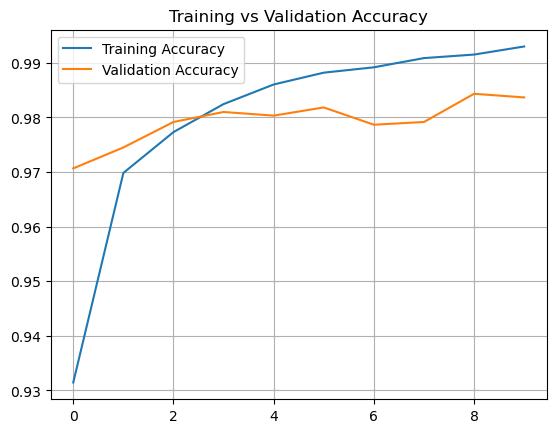

In [10]:
# Create a new figure for plotting
plt.figure()

# Plot training accuracy over epochs
# history.history['accuracy'] contains the training accuracy for each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy over epochs
# history.history['val_accuracy'] contains the validation accuracy for each epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.grid()
plt.title('Training vs Validation Accuracy')
plt.legend()

## Evaluation

In [11]:
# EVALUATE the model on the test data
# The model will compute the loss and accuracy on the test set (x_test, y_test)
[test_loss, test_accuracy] = model.evaluate(x_test, y_test)

# Print the test accuracy
# This is the final performance metric for the model on unseen test data
print('Test accuracy: {}'.format(test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9799 - loss: 0.0787
Test accuracy: 0.982200026512146


### Get Predictions

Note that the model outputs probabilities for each class. We then select the class with the highest probability as our final prediction.

In [12]:
# Get predictions from the model on the test data
# The model outputs PROBABILITIES for each class for each test sample
predictions = model.predict(x_test)

# CONVERT THE PROBABILITIES INTO A PREDICTED LABEL
# np.argmax returns the index of the maximum probability for each sample
# axis=1 indicates we are selecting the index along each row (per sample)
y_pred = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Let's see which are the most confused classes. 

Text(0.5, 1.0, 'Class Distribution for Mismatch in Label Prediction')

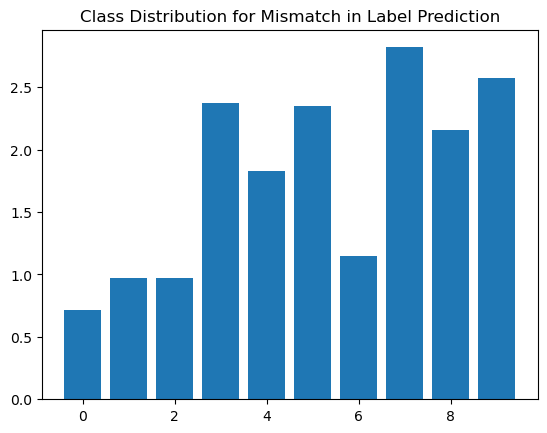

In [13]:
# Find the indices where the predicted labels do not match the true labels
# np.where returns the indices of elements that satisfy the condition (y_pred != y_test)
mismatch = np.where(y_pred != y_test)[0]

# Count the number of occurrences for each class in the mismatched predictions
mismatch_class_counter = Counter(y_test[mismatch])

# Initialize a dictionary to store the mismatch percentage for each class
mismatch_percentage = dict()

# Calculate the mismatch percentage for each digit class
for digit in test_class_counter.keys():
    # The percentage of mismatches for each class
    mismatch_percentage[digit] = mismatch_class_counter[digit] / test_class_counter[digit] * 100

# Create a new figure for plotting
plt.figure()

# Plot a bar chart showing the percentage of mismatches per class
plt.bar(mismatch_percentage.keys(), mismatch_percentage.values())

# Add a title to the plot
plt.title('Class Distribution for Mismatch in Label Prediction')

Let's print 4 random mispredicted samples

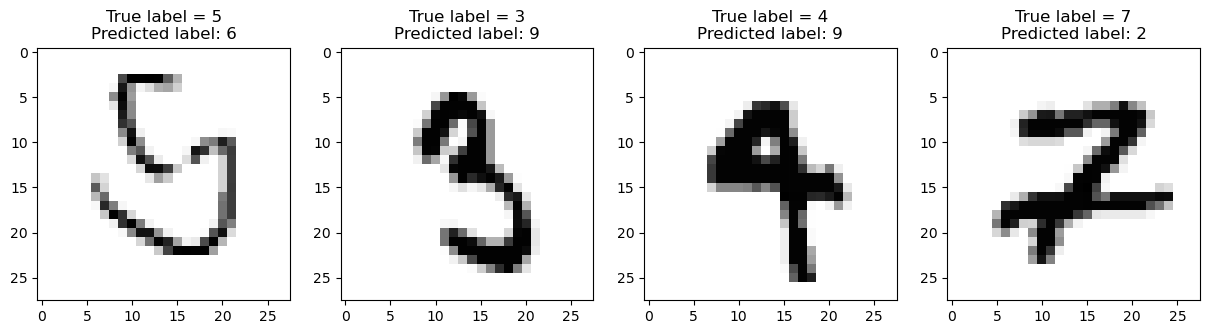

In [14]:
# Shuffle the indices of the mismatched predictions to select random samples
np.random.shuffle(mismatch)

# Select the first 4 mismatched samples after shuffling
idxes = mismatch[:4]

# Create a new figure to visualize the images
plt.figure(figsize=(15,8))

# Loop through the selected mismatched samples and plot them
for i in range(4):
    # Create a subplot for each image
    plt.subplot(1, 4, i+1)
    
    # Display the image with a grayscale colormap
    plt.imshow(x_test[idxes[i]], cmap='Greys')
    
    # Add the true and predicted label as the title for each image
    plt.title('True label = {}\nPredicted label: {}'.format(y_test[idxes[i]], y_pred[idxes[i]]))

Text(0, 0.5, 'True labels')

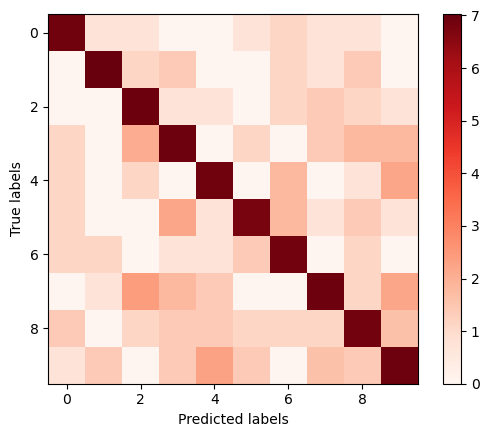

In [15]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
# The confusion matrix is calculated using the true labels (y_test) and predicted labels (y_pred)
# We take the logarithm of the confusion matrix values for better visualization of smaller values
cm = np.log(1 + confusion_matrix(y_test, y_pred))

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Display the confusion matrix as an image
# imshow() is used to show the matrix as a heatmap with a red colormap ('Reds')
im = ax.imshow(cm, interpolation='nearest', cmap='Reds')

# Add a color bar next to the plot to show the value scale
ax.figure.colorbar(im, ax=ax)

# Label the x-axis and y-axis for clarity
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save the model

We can save the model weights or the entire model (architecture + weights), either at the end of training or periodically during training (e.g., after every epoch).

In [ ]:
#Commands that you need only if you are using Google Colab
# mount drive folder
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
# Define the path to the main folder where files will be saved
folder = "./drive/MyDrive/AA24-25ML/"

# Define the destination folder path by joining the main folder path with a subfolder name
destination_folder = os.path.join(folder, '01_FFNN')

# Check if the destination folder exists; if not, create it
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

# List the contents of the destination folder
# This will return the files and subdirectories inside the destination folder
os.listdir(destination_folder)

[]

In [17]:
# Save the model weights to a file with the extension .weights.h5
# This saves only the weights, not the entire model architecture
model.save_weights(destination_folder + '/weights.weights.h5')

# Create a new model instance with the same architecture
# Since only the weights are being saved, we need to recreate the same model architecture
model_reloaded = create_model(compile_model=False)

# Load the saved weights into the newly created model
# This restores the model's learned weights from the file
model_reloaded.load_weights(destination_folder + '/weights.weights.h5')

# Compile the reloaded model to prepare it for evaluation
# We use the same loss function, optimizer, and metrics as in the original model
model_reloaded.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Evaluate the reloaded model on the test data
# This will return the test loss and accuracy for the reloaded model
[reloaded_test_loss, reloaded_test_accuracy] = model_reloaded.evaluate(x_test, y_test)

# Print the test accuracy from the original model (which was computed before reloading)
print('Test accuracy from original model: {}'.format(test_accuracy))

# Print the test accuracy from the reloaded model (after restoring the weights)
print('Test accuracy from reloaded model: {}'.format(reloaded_test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0787
Test accuracy from original model: 0.982200026512146
Test accuracy from reloaded model: 0.982200026512146


You can also save the weights during training, using Keras callbacks.

In [18]:
# Saving checkpoints during training with Keras CALLBACKS

# Define a folder to store the checkpoints
checkpoint_folder = destination_folder + "/training_00_FFNN/"

# Create the checkpoint folder if it doesn't already exist
if not os.path.exists(checkpoint_folder): 
    os.mkdir(checkpoint_folder)

# Define the full path template for saving checkpoints
# This includes the epoch number in the filename using str.format
checkpoint_path = checkpoint_folder + "/cp-{epoch:04d}.weights.h5"

# Extract the directory path (in case it's needed later)
checkpoint_dir = os.path.dirname(checkpoint_path)

# DEFINE A KERAS CALLBACK to save model checkpoints during training
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,         # File path pattern to save checkpoints
    verbose=1,                         # Log saving actions
    save_weights_only=True,           # SAVE ONLY WEIGHTS, not the full model
    save_freq='epoch'                 # Save weights at the end of every epoch
)

# Create and compile a new model instance
model = create_model(compile_model=True)

# Optionally save the initial weights before training starts (epoch 0)
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model for 10 epochs with the checkpoint callback enabled
# This will save weights to a new file at the end of each epoch
model.fit(
    x_train, y_train,
    epochs=10,
    callbacks=[cp_callback],
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8914 - loss: 0.3665
Epoch 1: saving model to ./drive/MyDrive/AA24-25ML/01_FFNN/training_00_FFNN//cp-0001.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8915 - loss: 0.3664 - val_accuracy: 0.9669 - val_loss: 0.1112
Epoch 2/10
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9701 - loss: 0.0964
Epoch 2: saving model to ./drive/MyDrive/AA24-25ML/01_FFNN/training_00_FFNN//cp-0002.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9701 - loss: 0.0964 - val_accuracy: 0.9748 - val_loss: 0.0797
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9787 - loss: 0.0682
Epoch 3: saving model to ./drive/MyDrive/AA24-25ML/01_FFNN/training_00_FFNN//cp-0003.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9787 - loss: 0.0682 - val_accuracy: 0.9771 - val_loss: 0.0754
Epoch 4/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9826 - loss: 0

In [20]:
# SAVING FULLY-FUNCTIONAL MODEL

# Save the entire model to a single HDF5 (.h5) file
# This includes the model architecture, weights, and optimizer state
model.save(destination_folder + '/mnist_00_ffnn.h5')

# Load the saved model from file
# This recreates the model exactly as it was at the time of saving
new_model = tf.keras.models.load_model(destination_folder + '/mnist_00_ffnn.h5')

# Display the architecture of the reloaded model
print(new_model.summary())

# Evaluate the reloaded model on the test dataset
# This verifies that the model's performance is preserved after saving and loading
[new_test_loss, new_test_accuracy] = new_model.evaluate(x_test, y_test)

# Compare the accuracy of the original model and the reloaded one
print('\n\nTest accuracy from original model: {}'.format(test_accuracy))
print('Test accuracy from new model: {}'.format(new_test_accuracy))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,052 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0903


Test accuracy from original model: 0.982200026512146
Test accuracy from new model: 0.9814000129699707


<span style="color:red"><strong>🏋️‍♀️ Exercises</strong></span>
- What happens if dropout is removed?
- Does it help to add more dense layers?
- Try to visually inspect the digits that are wrongly recognized by the FFNN: can you correctly classify them?

## Overview of Keras API for Creating Models

In the previous example, we used the **Sequential API**, where a model is built by stacking layers linearly — each layer has exactly one input and one output.

However, `tf.keras` offers more flexible ways to define models:

- **Functional API**  
  Enables the creation of complex architectures, such as models with multiple inputs and outputs, shared layers, and NON-LINEAR topologies (e.g., skip connections or residual networks).

- **Subclassing (Custom Model Definition)**  
  Allows you to define a model by subclassing the `tf.keras.Model` class and manually implementing the `call()` method. This approach is ideal for building highly customized models or for research purposes.

### Functional API

The Functional API allows us to build models with more complex topologies than the Sequential API, including:

- **Multi-input models**
- **Multi-output models**
- **Models with shared layers** (the same layer used multiple times)
- **Models with non-sequential data flows** (e.g., skip connections, residual networks)

Despite the added flexibility, models built using the Functional API are compiled, trained, and evaluated in the same way as Sequential models.

In [21]:
### Example: Building a Model with the Functional API

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model # NON SEQUENTIAL

# The Functional API defines the data flow explicitly, starting from Input
inputs = Input(shape=(28, 28))  # Symbolic placeholder for input data (no need to specify batch size)

# Stesso modello di prima di Sequential, ma definito in altro modo
x = Flatten()(inputs)           # Flatten the 2D image into a 1D vector
x = Dense(512, activation='relu')(x)  # Fully connected hidden layer with ReLU activation
x = Dropout(0.2)(x)             # Dropout layer for regularization
predictions = Dense(10, activation='softmax')(x)  # Output layer with softmax for multi-class classification

# Create the Model object by specifying inputs and outputs
model = Model(inputs=inputs, outputs=predictions)

# Compile the model: define loss function, optimizer, and evaluation metric
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model on the training data
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

# Evaluate the model on the test set
model.evaluate(x_test, y_test)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8880 - loss: 0.3819 - val_accuracy: 0.9720 - val_loss: 0.0984
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9677 - loss: 0.1061 - val_accuracy: 0.9772 - val_loss: 0.0767
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9786 - loss: 0.0687 - val_accuracy: 0.9817 - val_loss: 0.0698
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9843 - loss: 0.0506 - val_accuracy: 0.9772 - val_loss: 0.0831
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9780 - val_loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9735 - loss: 0.0836


[0.06694124639034271, 0.9779999852180481]

### Perchè non si può sempre usare Sequential API: A More Involved Case - Multi-Output Model

Suppose we want to train a model that assesses the credit risk of loan applicants. Each applicant is described by 30 tabular features (e.g., age, income, credit score, employment type, etc.).
The model should output:
- **Default risk** (binary classification): predict whether the applicant is likely to default on the loan.
- **Expected loss amount** (regression): estimate how much money the lender stands to lose if the applicant defaults.

Why a Multi-Ouput model? 
- Both outputs depend on the same features. Shared layers allow the model to learn common representations, improving performance.
- It is computationally efficient — one model, one inference step.

This use case is a great candidate for Keras's **Functional API**, which allows handling multiple outputs (and inputs) within a single model.

In [25]:
from tensorflow.keras.models import Model

input_data = Input(shape=(30,))

# shared layers 
x = Dense(64, activation='relu')(input_data)
x = Dense(32, activation='relu')(x)

# Output 1: DEFAULT PROBABILITIES (classification)
default_output = Dense(1, activation='sigmoid', name='default_risk')(x)

# Output 2: EXPECTED LOSS (regression)
loss_output = Dense(1, name='expected_loss')(x)

model = Model(inputs=input_data, outputs=[default_output, loss_output])

### Custom Model Definition

By subclassing `tf.keras.Model` and defining the forward pass (`call` method), it is possible to build completely custom models while still leveraging automatic gradient computation and all of Keras's high-level features.

Additionally, custom layers can be created by subclassing `tf.keras.layers.Layer`.

⚠️ **Note:** While this is the most flexible approach, it is also the most error-prone. It requires careful implementation of the forward pass and model structure.

### Example: Custom MNIST Model via Subclassing

The example below shows how to create a custom model by subclassing `tf.keras.Model`. This approach gives you full control over the forward pass:

- `__init__()` is used to define the model architecture.
- `call()` defines how data flows through the layers.

The model consists of:
- A `Flatten` layer to convert image input into a vector.
- A dense hidden layer with ReLU activation.
- A dropout layer to reduce overfitting.
- An output layer with `sigmoid` activation (suitable for multi-label tasks).

This architecture can be compiled, trained, and evaluated like any other Keras model.

In [26]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__(name='custom_MNIST_model')
        self.num_classes = num_classes
        
        # Define the model layers
        self.Flatten = Flatten()                         # Flattens 2D image into 1D vector
        self.dense_1 = Dense(512, activation='relu')     # First dense layer with ReLU activation
        self.dropout = Dropout(0.2)                      # Dropout for regularization
        self.dense_2 = Dense(num_classes, activation='sigmoid')  # Output layer with sigmoid (multi-label classification)

    def call(self, inputs): 
        # Define the FORWARD PASS
        x = self.Flatten(inputs)
        x = self.dense_1(x)
        x = self.dropout(x)
        return self.dense_2(x)  # Output logits

In [27]:
# Instantiate the custom model class with 10 output classes (e.g., for MNIST)
model = MyModel(num_classes=10)

# Compile the model by specifying the loss function, optimizer, and evaluation metric
# - Loss: sparse_categorical_crossentropy (suitable for integer labels in multi-class classification)
# - Optimizer: Adam (adaptive learning rate)
# - Metrics: accuracy (to monitor classification performance)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model on the training data for 5 epochs
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9000 - loss: 0.3354
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9761 - loss: 0.0815
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9835 - loss: 0.0512
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9894 - loss: 0.0328
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9926 - loss: 0.0231


In [28]:
# Evaluate the trained model on the test set.
# Returns the loss and accuracy values.
loss, acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0771
0.9807999730110168


## [TensorBoard](https://github.com/tensorflow/tensorboard/blob/master/README.md)

TensorBoard is a powerful dashboarding tool that helps with:

- Training model visualization
- Debugging workflows
- Selecting and tuning hyperparameters
- Inspecting model architecture
- Exploring datasets
- And more...

![TensorBoard Cockpit Example](https://www.tensorflow.org/images/mnist_tensorboard.png)

TensorBoard can be configured in many ways. Below, we explore the simplest setup using the `tf.keras.callbacks.TensorBoard` callback.

This tool can be used in combination with other callbacks, such as:

- Saving model checkpoints (`ModelCheckpoint`)
- Implementing early stopping (`EarlyStopping`)

In [29]:
# Load the MNIST dataset.
# x_train and x_test are images of handwritten digits (28x28 grayscale).
# y_train and y_test are the corresponding labels (0 through 9).
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1] by dividing by 255.
# This helps the model train faster and improves performance.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [30]:
# Create the main folder path where models will be saved
folder = "./drive/MyDrive/AA24-25ML/"

# Define a subdirectory specifically for FFNN models with TensorBoard checkpoints
destination_folder = os.path.join(folder, 'FFNN_tensorboard/checkpoints')

# Create the directory if it doesn't already exist (recursively makes all intermediate directories)
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# List all files and folders in the destination directory to confirm it's accessible
os.listdir(destination_folder)

[]

### Callbacks Definition

First, we used a callback to save the weights of the model at each epoch.  
Now, we can define and add another callback to use **TensorBoard**.

TensorBoard provides visualizations and metrics that help in monitoring and debugging training in real-time.  
It can be used alongside other callbacks such as checkpoint saving or early stopping.

We define two callbacks:

1. **TensorBoard Callback**: This callback allows us to log training data for visualization in TensorBoard. It includes the following parameters:
   - `log_dir`: Directory to store logs.
   - `histogram_freq`: The frequency (in epochs) at which to compute activation and weight histograms.
   - `write_graph`: Whether to write the model graph to the logs.
   - `write_images`: Whether to write the model weights as image summaries.
   - `update_freq`: How often to update the logs (can be `'epoch'`, `'batch'`, etc.).
\\
2. **ModelCheckpoint Callback**: This callback saves the model weights at regular intervals (in this case, after each epoch). It includes the following parameters:
   - `filepath`: Path to save the model weights, with the format including the epoch number and validation loss.
   - `monitor`: The metric to monitor, which is the validation loss here.
   - `save_best_only`: Set to `False` to save weights at every epoch, or `True` to save only the best weights according to the monitored metric.
   - `save_weights_only`: Set to `True` to save only the weights, not the entire model.
   - `mode`: Defines whether the `monitor` value should be maximized or minimized.
   - `save_freq`: The frequency at which to save the model weights.

In [31]:
callbacks = [
            tf.keras.callbacks.TensorBoard(     # callback for TensorBoard
                log_dir='tb_logs',
                histogram_freq=1,
                write_graph=True,
                write_images=False,
                update_freq='epoch'
                ),
            tf.keras.callbacks.ModelCheckpoint(
                filepath= destination_folder+'/weights_{epoch:02d}-{val_loss:.2f}.weights.h5',
                monitor='val_loss',
                verbose=0,
                save_best_only=False,   # this would save only the best model wrt validation loss
                save_weights_only=True, 
                mode='auto',   
                save_freq='epoch', # save every epoch
                )
            ]


# Fit the model with the defined callbacks
model = create_model(compile_model=True)  # Create the model (function `create_model` must define the model architecture)
history = model.fit(
    x_train,  # Training data
    y_train,  # Training labels
    batch_size=32,  # Number of samples per gradient update
    epochs=10,  # Number of epochs to train the model
    validation_split=0.1,  # Use 10% of the data for validation
    callbacks=callbacks  # Pass the defined callbacks
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8876 - loss: 0.3819 - val_accuracy: 0.9633 - val_loss: 0.1242
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9696 - loss: 0.1006 - val_accuracy: 0.9720 - val_loss: 0.0909
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9776 - loss: 0.0700 - val_accuracy: 0.9810 - val_loss: 0.0657
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9843 - loss: 0.0496 - val_accuracy: 0.9815 - val_loss: 0.0694
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accuracy: 0.9807 - val_loss: 0.0707
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9885 - loss: 0.0356 - val_accuracy: 0.9813 - val_loss: 0.0774
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9895 - loss: 0.0304 - val_accuracy: 0.9822 - val_loss: 0.0776
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9912 -

In [32]:
# evaluate model 
[test_loss, test_accuracy] = model.evaluate(x_test,y_test)
print('Test accuracy: {}'.format(test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9782 - loss: 0.0848
Test accuracy: 0.9822999835014343


**Visualize tensorboard**  
You can launch tensorboard from terminal and then open `localhost:6006` in the browser.

In [33]:
# launch tensorboard from jupyter
%load_ext tensorboard
%tensorboard --logdir tb_logs

In [34]:
# using API instead
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided,
# # the most recently launched TensorBoard is used
notebook.display(height=1000)


Known TensorBoard instances:
  - port 6006: logdir tb_logs (started 0:00:07 ago; pid 11863)
Selecting TensorBoard with logdir tb_logs (started 0:00:07 ago; port 6006, pid 11863).


## Regularization

There are many regularization methodologies that can be useful in training Neural Networks:

- **L1/L2 Regularization**: These add penalty terms to the loss function based on the weights of the model. L1 regularization (LASSO) encourages sparsity, while L2 (Ridge) regularization penalizes large weights.
- **Dropout**: A technique where during training, random neurons are dropped out, i.e., set to zero, with a certain probability. This helps prevent overfitting by ensuring the model doesn't rely too heavily on any particular neuron.
- **Early Stopping**: A technique where training stops if the validation loss stops improving for a specified number of epochs, helping to prevent overfitting.
- **Batch Normalization**: This normalizes the output of each layer so that it has a mean of 0 and a standard deviation of 1. This helps speed up training and can improve performance.

Let's see some of these regularization techniques in practice. We'll focus on a simple Feed-Forward Neural Network (FFNN) architecture for the MNIST classification problem.

In [35]:
# Load the MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values from [0, 255] to [0, 1]
# This is done by dividing the image pixel values by 255.0
x_train, x_test = x_train / 255.0, x_test / 255.0

In [36]:
log_dir = destination_folder + "/04_Regularization/reg_example_logs"
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [37]:
# Define a Sequential model using Keras
model = Sequential(
    [
        Input(shape=(28, 28)),  # Input layer, specifying the shape of the input (28x28 pixels)
        Flatten(),              # Flatten the 2D input (28x28) into a 1D vector (784 elements)
        Dense(512, activation='relu'),  # Fully connected layer with 512 neurons and ReLU activation
        Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) and softmax activation for multi-class classification
    ]
)

# Compile the model: specify loss function, optimizer, and evaluation metric
model.compile(
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='adam',                        # Adam optimizer for efficient training
    metrics=['accuracy'],                    # Use accuracy as the evaluation metric during training and testing
)

### L1 Regularization
When defining a dense layer, we can specify the type of regularization to apply. In the case of **L1 regularization**, we add a penalty to the loss function based on the absolute values of the weights and biases. This penalty encourages sparsity by pushing some of the weights to zero, which helps to prevent overfitting by reducing model complexity.

In Keras, you can specify L1 regularization using the `kernel_regularizer` and `bias_regularizer` parameters in the `Dense` layer. The **lambda** parameter (taking the value of `0.01` in the example below) controls the strength of the regularization.

In [ ]:
# Define a Sequential model with L1 regularization
model_l1 = Sequential(
    [
        Input(shape=(28, 28)),  # Input layer with shape (28, 28), representing MNIST images
        Flatten(),              # Flatten the 2D image (28x28) into a 1D vector (784 elements)
        
        # First Dense layer with L1 regularization on both weights and biases
        Dense(512, activation='relu',  # 512 neurons in the layer with ReLU activation
              kernel_regularizer=tf.keras.regularizers.l1(0.01),  # Apply L1 regularization to weights (0.01 is the regularization strength)
              bias_regularizer=tf.keras.regularizers.l1(0.01)),   # Apply L1 regularization to biases

        # Second Dense layer (output layer) with L1 regularization
        Dense(10, activation='softmax',  # Output layer with 10 neurons (for the 10 classes in MNIST)
              kernel_regularizer=tf.keras.regularizers.l1(0.01),  # Apply L1 regularization to weights
              bias_regularizer=tf.keras.regularizers.l1(0.01))    # Apply L1 regularization to biases
    ]
)

# Compile the model: specify loss function, optimizer, and evaluation metric
model_l1.compile(
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification (labels are integers)
    optimizer='adam',                        # Adam optimizer for efficient gradient descent
    metrics=['accuracy'],                    # Track accuracy as the evaluation metric during training and testing
)

### L2 Regularization
When defining a dense layer, we can specify the type of regularization to apply. In the case of **L2 regularization**, we add a penalty to the loss function based on the squared values of the weights and biases. This penalty encourages smaller weights, which helps to prevent overfitting by reducing the complexity of the model.

In Keras, you can specify L2 regularization using the `kernel_regularizer` and `bias_regularizer` parameters in the `Dense` layer. The **lambda** parameter (taking the value of `0.01` in the example below) controls the strength of the regularization.

In [ ]:
# Create a Sequential model
model_l2 = Sequential(
    [
        # Input layer: shape of each input is (28, 28), corresponding to the MNIST image size
        Input(shape=(28, 28)), 
        
        # Flatten the 2D input images into 1D vector (28*28 = 784 features)
        Flatten(),
        
        # First Dense layer:
        # 512 neurons, ReLU activation, L2 regularization applied on weights and biases
        # L2 regularization with lambda = 0.01 on kernel (weights) and bias
        Dense(512, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(0.01),   # L2 regularization on kernel (weights)
              bias_regularizer=tf.keras.regularizers.l2(0.01)),    # L2 regularization on bias
        
        # Second Dense layer (output layer):
        # 10 neurons for classification into 10 categories (digits 0-9), softmax activation
        # L2 regularization applied on weights and biases
        Dense(10, activation='softmax',
              kernel_regularizer=tf.keras.regularizers.l2(0.01),   # L2 regularization on kernel (weights)
              bias_regularizer=tf.keras.regularizers.l2(0.01))     # L2 regularization on bias
    ])

# The compile step specifies the model's training configuration
# We use sparse_categorical_crossentropy for multi-class classification and Adam optimizer
model_l2.compile(
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification (integer labels)
    optimizer='adam',                        # Adam optimizer
    metrics=['accuracy'],                    # We will track accuracy during training and evaluation
)

### Dropout

**Dropout** is a regularization technique used to prevent overfitting in neural networks. During training, it randomly "drops" (sets to zero) a fraction of the input units in a layer at each update step. This prevents the network from becoming overly reliant on any single feature or neuron, encouraging the network to learn more robust and generalized representations.

In Keras, dropout is applied using the `Dropout` layer. The fraction of dropped units is controlled by the parameter `rate`, where a value of 0.5 means 50% of the units are dropped during training. Dropout is only active during training and does not affect the model's behavior during inference.

In [ ]:
# Create a Sequential model
model_dropout = Sequential(
    [
        # Input layer: shape of each input is (28, 28), corresponding to the MNIST image size
        Input(shape=(28, 28)), 
        
        # Flatten the 2D input images into a 1D vector (28*28 = 784 features)
        Flatten(),
        
        # First Dense layer:
        # 512 neurons, ReLU activation function
        # This layer learns a dense representation of the input features
        Dense(512, activation='relu'),
        
        # Dropout layer: randomly sets 50% of the input units to 0 during training
        # This helps prevent overfitting by reducing reliance on specific neurons
        Dropout(0.5),
        
        # Second Dense layer (output layer):
        # 10 neurons for classification into 10 categories (digits 0-9), softmax activation
        # This layer outputs probabilities for each class
        Dense(10, activation='softmax')
    ])

# The compile step specifies the model's training configuration
# We use sparse_categorical_crossentropy for multi-class classification and Adam optimizer
model_dropout.compile(
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification (integer labels)
    optimizer='adam',                        # Adam optimizer
    metrics=['accuracy'],                    # We will track accuracy during training and evaluation
)

### Batch normalization
### Batch Normalization (Ioffe and Szegedy, 2014)

**Batch normalization** normalizes the activations of the previous layer for each batch. It applies a transformation to maintain the mean activation close to 0 and the activation standard deviation close to 1. This helps to stabilize and speed up the training process by reducing internal covariate shift.

This layer is particularly useful in deep networks to improve performance and training speed.


In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Defining the model with BatchNormalization layers
model_bn = Sequential(
    [
        Input(shape=(28, 28)),  # Input layer, 28x28 pixel image
        Flatten(),  # Flatten the 2D image into a 1D vector
        BatchNormalization(),  # Apply BatchNormalization to the input
        Dense(512, activation='relu'),  # Fully connected layer with ReLU activation
        BatchNormalization(),  # Apply BatchNormalization after the dense layer
        Dense(10, activation='softmax')  # Output layer with softmax activation for multi-class classification
    ])

# The compile step specifies the training configuration.
# The loss function used is sparse categorical cross-entropy since the labels are integers.
model_bn.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',  # Adam optimizer for better training speed
                  metrics=['accuracy'],  # Track accuracy during training
                  )

### Early Stopping

**Early stopping** is a technique used during training to prevent overfitting by monitoring the performance of the model on a validation dataset. When the monitored performance metric (such as validation loss or accuracy) stops improving for a specified number of epochs (called **patience**), training is halted.

This technique helps to stop training before the model starts to overfit, saving computational resources and improving the model's generalization ability.

#### Key Parameters:
- **monitor**: The metric to monitor (e.g., `val_loss`, `val_accuracy`).
- **patience**: The number of epochs with no improvement after which training will be stopped.
- **restore_best_weights**: If `True`, the model weights from the epoch with the best performance will be restored.


In [ ]:
# Early stopping callback definition
# Monitor the validation loss and stop training if it doesn't improve for 2 consecutive epochs
ESCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# Define a simple Sequential model with fully connected layers
model_es = Sequential(
    [
        Input(shape=(28, 28)),  # Input layer for 28x28 pixel images
        Flatten(),  # Flatten the 2D input image into a 1D vector
        Dense(512, activation='relu'),  # Fully connected layer with 512 units and ReLU activation
        Dense(10, activation='softmax')  # Output layer with 10 units (one for each class) and softmax activation
    ])

# The compile step specifies the training configuration.
# Using sparse categorical cross-entropy as the loss function because the labels are integers
# Adam optimizer is used for faster convergence
# Accuracy is tracked as a metric during training
model_es.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',  # Adam optimizer for faster and more efficient training
                  metrics=['accuracy'],  # Track accuracy during training
                  )

### Training

In [ ]:
# Training the model without regularization, with TensorBoard logging enabled for visualization
history = model.fit(x_train, y_train, batch_size=32, epochs=10,
                    validation_split=0.1,  # Use 10% of the training data for validation
                    callbacks=[ 
                        tf.keras.callbacks.TensorBoard(
                            log_dir=log_dir + r'\no_regularization',  # Directory for TensorBoard logs
                            histogram_freq=1,  # Enable histogram computation for activations
                            write_graph=True,  # Save the graph for visualization
                            write_images=False,  # Do not save images of the model weights
                            update_freq='epoch'  # Update logs at each epoch
                        )
                    ], verbose=1)  # Show training progress

# Training the model with L1 regularization and TensorBoard logging enabled for visualization
history_l1 = model_l1.fit(x_train, y_train, batch_size=32, epochs=10,
                          validation_split=0.1,
                          callbacks=[
                              tf.keras.callbacks.TensorBoard(
                                  log_dir=log_dir + r'\l1_regularization',  # Directory for TensorBoard logs
                                  histogram_freq=1,
                                  write_graph=True,
                                  write_images=False,
                                  update_freq='epoch'
                              )
                          ], verbose=1)

# Training the model with L2 regularization and TensorBoard logging enabled for visualization
history_l2 = model_l2.fit(x_train, y_train, batch_size=32, epochs=10,
                          validation_split=0.1,
                          callbacks=[
                              tf.keras.callbacks.TensorBoard(
                                  log_dir=log_dir + r'\l2_regularization',  # Directory for TensorBoard logs
                                  histogram_freq=1,
                                  write_graph=True,
                                  write_images=False,
                                  update_freq='epoch'
                              )
                          ], verbose=1)

# Training the model with Dropout regularization and TensorBoard logging enabled for visualization
history_dropout = model_dropout.fit(x_train, y_train, batch_size=32, epochs=10,
                                    validation_split=0.1,
                                    callbacks=[
                                        tf.keras.callbacks.TensorBoard(
                                            log_dir=log_dir + r'\dropout_regularization',  # Directory for TensorBoard logs
                                            histogram_freq=1,
                                            write_graph=True,
                                            write_images=False,
                                            update_freq='epoch'
                                        )
                                    ], verbose=1)

# Training the model with Batch Normalization regularization and TensorBoard logging enabled for visualization
history_bn = model_bn.fit(x_train, y_train, batch_size=32, epochs=10,
                          validation_split=0.1,
                          callbacks=[
                              tf.keras.callbacks.TensorBoard(
                                  log_dir=log_dir + r'\batch_norm_regularization',  # Directory for TensorBoard logs
                                  histogram_freq=1,
                                  write_graph=True,
                                  write_images=False,
                                  update_freq='epoch'
                              )
                          ], verbose=1)

# Training the model with Early Stopping regularization and TensorBoard logging enabled for visualization
history_es = model.fit(x_train, y_train, batch_size=32, epochs=10,
                       validation_split=0.1,
                       callbacks=[
                           tf.keras.callbacks.TensorBoard(
                               log_dir=log_dir + r'\early_stop_regularization',  # Directory for TensorBoard logs
                               histogram_freq=1,
                               write_graph=True,
                               write_images=False,
                               update_freq='epoch'
                           ),
                           ESCallback  # EarlyStopping callback to monitor validation loss
                       ], verbose=1)

### Evaluation

In [ ]:
# Evaluate the models on the test data and store the test accuracies for each model
_, test_accuracy = model.evaluate(x_test, y_test)  # Model with no regularization
_, test_accuracy_l1 = model_l1.evaluate(x_test, y_test)  # Model with L1 regularization
_, test_accuracy_l2 = model_l2.evaluate(x_test, y_test)  # Model with L2 regularization
_, test_accuracy_dropout = model_dropout.evaluate(x_test, y_test)  # Model with Dropout regularization
_, test_accuracy_bn = model_bn.evaluate(x_test, y_test)  # Model with Batch Normalization regularization
_, test_accuracy_es = model_es.evaluate(x_test, y_test)  # Model with Early Stopping regularization

# Print the test accuracies for each model with proper formatting
print('{:<30}:\t Test accuracy: {}'.format('no regularization', test_accuracy))
print('{:<30}:\t Test accuracy: {}'.format('l1 regularization', test_accuracy_l1))
print('{:<30}:\t Test accuracy: {}'.format('l2 regularization', test_accuracy_l2))
print('{:<30}:\t Test accuracy: {}'.format('dropout regularization', test_accuracy_dropout))
print('{:<30}:\t Test accuracy: {}'.format('batch norm regularization', test_accuracy_bn))
print('{:<30}:\t Test accuracy: {}'.format('early stopping regularization', test_accuracy_es))